In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 불러오기 및 확인
file_path = "../data/time_series_data.csv"
df = pd.read_csv(file_path)

# 데이터 불러오기
gdp_file = "../data/gdp_data.csv"
pop_file = "../data/population_data.csv"

gdp_df = pd.read_csv(gdp_file)  # GDP 데이터 로드
population_df = pd.read_csv(pop_file)  # 인구 데이터 로드

# 2. 데이터 병합 (국가와 연도를 기준으로 GDP와 인구 데이터를 하나로 합침)
# 병합을 통해 동일한 국가 및 연도 데이터를 연결
merged_df = pd.merge(gdp_df, population_df, on=["Country", "Year"])

In [3]:
# 2. 데이터 확인
df.info()  # 데이터 타입 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    21 non-null     int64  
 1   Value   21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
df.head()  # 상위 5개 행

,Year,Value
0,2000,51.561810
1,2001,54.063663
2,2002,56.332164
3,2003,58.470520
4,2004,59.913605


In [7]:
# 3. 이동 평균(Moving Average) 계산
window_size = 3  # 이동 평균 윈도우 크기 (3년 기준)
df["Moving_Avg"] = df["Value"].rolling(window=window_size).mean()  # 이동 평균 추가

In [8]:
# 3. 1인당 GDP(GDP per Capita) 계산
# 1인당 GDP = 총 GDP / 총 인구
merged_df["GDP_per_Capita"] = merged_df["GDP"] / merged_df["Population"]

In [9]:
# 4. 변동률(Cumulative Growth Rate, CAGR) 계산
df["Pct_Change"] = df["Value"].pct_change() * 100  # 연도별 변동률(%) 계산

In [10]:
# 5. 시각화: 원본 데이터와 이동 평균선 표시
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

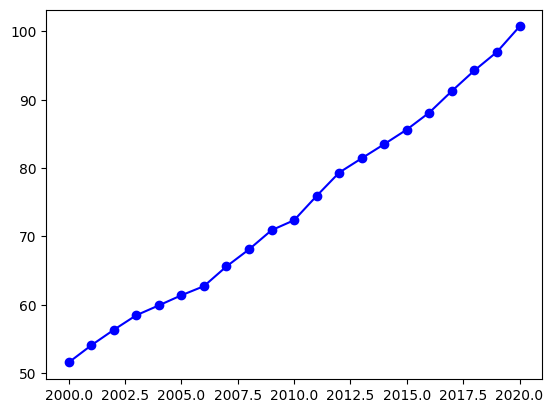

In [20]:
# 5.1 원본 데이터 시각화 (파란색 선)
plt.plot(df["Year"], df["Value"], marker='o', linestyle='-', color='b', label="Original Value")


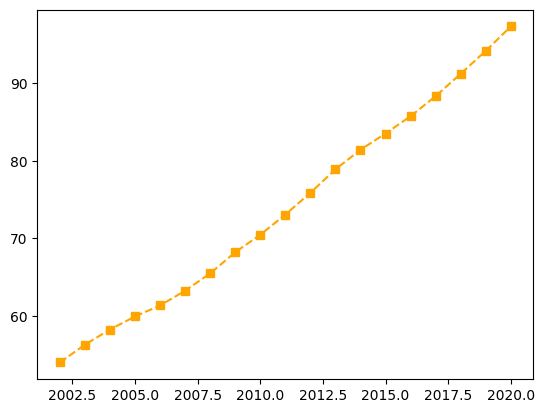

In [21]:
# 5.2 이동 평균선 시각화 (주황색 선)
plt.plot(df["Year"], df["Moving_Avg"], marker='s', linestyle='--', color='orange', label=f"{window_size}-Year Moving Avg")


C:\Users\wodus\AppData\Local\Temp\ipykernel_12252\4050409993.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # 범례 표시


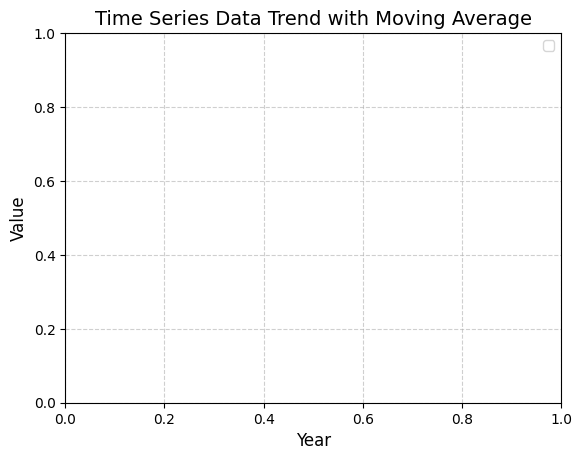

In [22]:
# 6. 그래프 스타일 설정
plt.xlabel("Year", fontsize=12)  # x축 레이블 설정
plt.ylabel("Value", fontsize=12)  # y축 레이블 설정
plt.title("Time Series Data Trend with Moving Average", fontsize=14)  # 그래프 제목 설정
plt.grid(True, linestyle="--", alpha=0.6)  # 격자 스타일 설정
plt.legend()  # 범례 표시

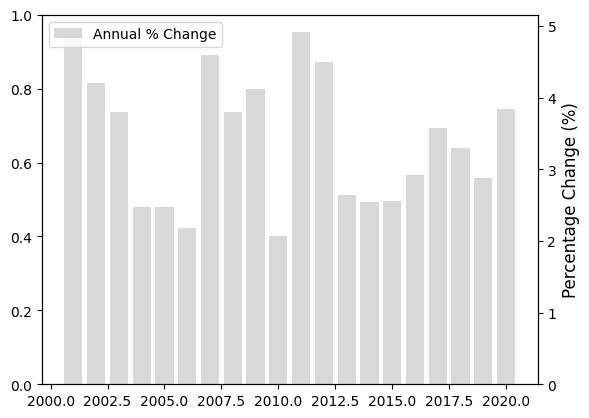

In [23]:
# 7. 변동률(%) 바 그래프 추가 (보조 축 사용)
ax2 = plt.gca().twinx()  # 새로운 y축 추가
ax2.bar(df["Year"], df["Pct_Change"], alpha=0.3, color="gray", label="Annual % Change")  # 변동률 막대 그래프
ax2.set_ylabel("Percentage Change (%)", fontsize=12)  # 보조 y축 레이블 설정
ax2.legend(loc="upper left")  # 범례 위치 설정

In [19]:
# 8. 그래프 출력
plt.show()